# Primer proyecto


## Marco teórico
Se escribirá un código para visualizar diferentes familias del conjunto de Julia y Mandelbrot, en el proceso se modelarán diversas formas biológicas. Ambos conjuntos se forman a partir del estudio de ciertas funciones, $f_c$, sobre las cuales se iteran los números complejos. La notación para la función, $f_c$, denota que ésta depende de un parámetro $c \in C$.

El conjunto de Julia $J_{f_c}$, para una constante $c$ particular, está formado por todos aquellos puntos del plano complejo en el cual la sucesión siguiente es acotada:

$$z_0=z$$
$$z_{n+1}=f_c(z_n)$$


El conjunto de Mandelbrot $M_{f_c}$, de forma similar, está formado por el conjunto de puntos del plano complejo, en el cual $c$ pertenece al conjunto si la siguiente sucesión es acotada:

$$z_0=0$$
$$z_{n+1}=f_c(z_n)$$

El conjunto de puntos que resulta de la sucesión, para cada $z$ implicado, se conoce como la órbita de $z$ por $f_c$. Para determinar los elementos de una familia del conjunto de $J_{f_c}$ y $M_{f_c}$, se utiliza un método iterativo, verificando el criterio convergencia siguiente, en cada paso de la iteración donde se obtiene un elemento de la órbita:

$$|z_n|<2$$

Si en algún punto de la iteración no se cumple el criterio, el punto del plano complejo analizado no pertenece al conjunto. 

El conjunto de Julia y Mandelbrot están dados por una familia muy popular de sistemas dinámicos complejos, esto es la familia de polinomios cuadráticos complejos:

$$f_c=z^2+c$$

Formas biológicas han sido representadas mediante procesos iterativos, como el descrito anteriormente. Pero, empleando un conjunto de funciones $(f_c)$ más complejas que las estudiadas en los conjuntos de Julia y Mandelbrot. A continuación, se listan algunas de las funciones usadas para reproducir formas biológicas:

$$f_1(z,c)=\sin(z)+z^2+c$$
$$f_2(z,c)=z^z+z^6+c$$
$$f_3(z,c)=z^z+z^6+c$$
$$f_4(z,c)=z^5+c$$
$$f_5(z,c)=z^3+c$$

La iteración es realizada hasta que la magnitud de la componente real e imaginaria de los elementos de la órbita sobrepasa un determinado valor $\tau$ (un valor puede ser $\tau=100$), esto significa que el proceso iterativo se mentiene mientras se cumpla que la parte real o imaginaria satisfacen la condición:

$$|Re(z_n)|<\tau$$ 

$$|Im(z_n)|<\tau$$

Una manera de graficar los conjuntos de Julia, Mandelbrot y las formas biológicas, es graficar solamente los puntos que pertenecen al conjunto con un color determinado (monocromático). 

Para agregar colores a los gráficos, generalmente se utiliza el algoritmo de: Tiempo de Escape, aunque no es el único. El algoritmo consiste en asignar un color dependiendo del número de iteraciones realizadas antes que el elemento de la órbita no satisfaga el criterio de convergencia. De esta manera se visualiza aquellos elementos que pertenecen al conjunto y los que no, además, revela la velocidad de divergencia de la órbita en cada punto. 

### Requisitos
Para el desarrollo del proyecto deberá utilizar solamente los elementos abarcados en la primera semana del workshop, esto es, el uso de: estructuras de datos y control, tipos de datos primitivos del lenguaje. Por lo que **no utilizará** ningún paquete adicional, creado o desarrollado por la comunidad de Julia, a excepción del paquete Plots.

Para completar este proyecto deberá realizar los siguientes items:
1. Graficar un conjunto de Julia, para un $c$ arbitrario (monocromático). 
2. Graficar el conjunto de Mandelbrot (monocromático).
3. Graficar una forma biológica, par un c arbitrario (monocromático).
4. Hacer una gráfica a color del conjunto de Mandelbrot usando el algoritmo de Tiempo de Escape.
5. Realizar una gráfica a color para un conjunto de Julia, para un $c$ arbitrario .
6. Realizar una gráfica a color para una forma biológica.

Para realizar las gráficas, deberá tomar en cuenta el uso de 'structs' para representar estructuras de datos particulares y también el uso de 'multiple dispatch'. 

### Criterios de Evaluación
Durante la evaluación del proyecto se tomarán en cuenta los siguientes aspectos:
- Cumplimiento de los requerimientos mencionados.
- Claridad y orden el código presentado.
- Completitud del proyecto, haciendo todas las partes que lo componen.
- Analizar y comentar el trabajo de otros grupos (Mediante el peer review).




## Bosquejo
### Gráficas
Para realizar las gráficas se utilizará el paquete Plots, por lo tanto el paquete debe ser importado:



In [1]:
using Plots


In [2]:
Plots.default(size = (2200,2200))



A continuación se mostrarán ejemplos para realizar gráficas con el paquete, los cuales pueden usarse para mostrar las formas biológicas y los conjuntos de Julia y Mandelbrot, una vez se hayan obtenido los datos necesarios.

Gráfico de números complejos:



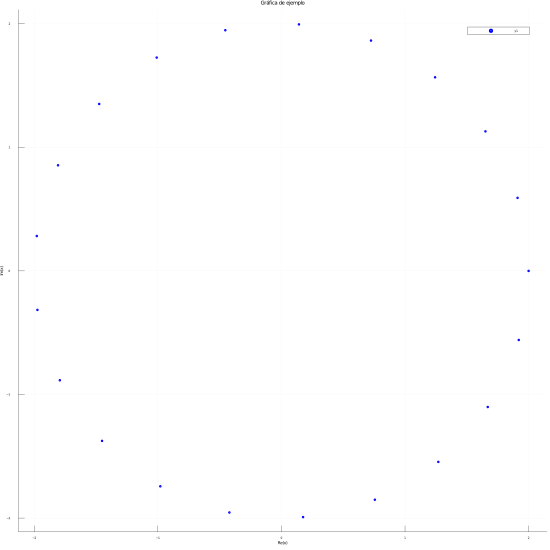

In [3]:
begin
	r = 2	
	zcomplejo = [r*cos(θ)+r*sin(θ)*im for θ in 0:0.3:2*pi]
	scatter(zcomplejo, seriescolor=:white,
		    markerstrokecolor=:blue,
		    aspectratio=1,
		    title="Gráfica de ejemplo")
end



Para colorear los gráficos del conjunto de Julia, Mandelbrot y las formas biológicas, utilizando el algoritmo de Tiempo de Escape,  se pueden utilizar mapas de calor. 



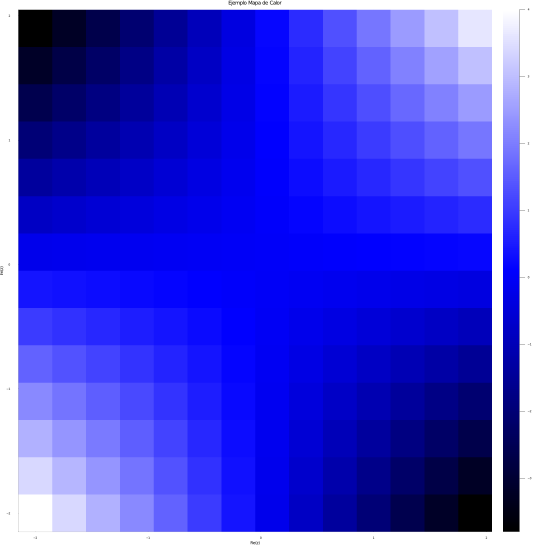

In [4]:
begin
	x = -2:0.3:2  
	y = -2:0.3:2
	colores = [i₁*i₂ for i₁ in x, i₂ in y]
	heatmap(x, y, colores, color=cgrad([:black,:blue,:white]), 
		    title="Ejemplo Mapa de Calor", xlabel="Re(z)", ylabel="Im(z)")
end



Para el mapa de calor, se necesita hacer una malla (las listas 'x' y 'y' del ejemplo anterior) y una matriz donde se guardan los valores que definen el color para cada punto de la malla.

### Pseudocódigo
Para clarificar los pasos a realizar, se muestra el siguiente algoritmo, cuando se desee obtener un gráfico con colores:

*NOTAS:* 
- Se utilizan algunas funciones que pertenecen al core y base de Julia, si no conoce o intuye su uso averigue sobre la función mediante `?<nombre_función>` o `methods(<nombre_función>)`.
- Usar `test_convergencia = b` para la creación de formas biológicas.
- Las variables rz, iz son las componentes real imaginaria del número complejo respectivamente, que define un punto de la región del plano complejo por analizar.
- La variable i es el contador del número de iteraciones.
- c y z representan números complejos.

~~~julia
1  Para rz = -2:0.3:2 Hacer ##Elección del rango puede ser diferente	
2  	  Para iz = -2:0.3:2 Hacer ##Elección del rango puede ser diferente	
3		z = complex(rz,iz)
4		##La precisión de la imagen es mejor si incrementa las iteraciones
5		Para i = 1:30 
6			z = f(z) + c
7			##Se verfica que z = complex(rz,iz) esté en el conjunto
8			##T depende del conjunto que se desea graficar
9			Si abs(z) > T Entonces break Fin 
10	   	Fin
11		color = i ##Indica la velocidad de divergencia de la orbita
12		Si test_convergencia = a Entonces 
13			Graficar punto en (rz,iz,color) 
14		Fin
15		Si test_convergencia = b Entonces 
16			Si real(z) < T || imag(z) < T Entonces
17				Graficar punto en (rz,iz,color) 
18			Fin
19		Fin
20	  Fin
21  Fin
~~~




## Solución




La solución del problema planteado puede seguir un camino diferente, pero siempre basado en el algoritmo proporcionado. Para completar la parte obligatoria de este proyecto rellene las partes que están incompletas de este documento, tome en cuenta la signatura de las funciones descritas y lo que esta debe hacer. A medida avance en el documento haga uso de las definiciones previas donde sea conveniente.




### Definición de objetos y funciones




+ A continuación construya un struct `Grid` (Grilla), donde se defina la región del plano complejo que debe ser analizado (límites en las abcisas y ordenadas) y el espacio entre cada punto de la grilla.



In [312]:
"""*
 Representa un objeto grilla 
"""
struct Grid{T<:Real}
	
end



+ Defina una función que cree una matriz de rangos para los ejes de las abcisas y ordenas. 



In [313]:
"""
	makeGrid(g::Grid)
Crear una matriz de rangos [rango_abcisas,rango_ordenadas]
"""
function makeGrid(g::Grid)
	
end



+ Defina funciones de una línea para las formas biológicas y la familia de polinomios cuadráticos complejos 



In [314]:
begin ##*
	
end



+ Defina una función que retorne `true` si el criterio de convergencia para los conjuntos $J_{_c}$ y $M_{f_c}$ se cumple, `false` en caso contrario.



In [315]:
""" *
	testJM(z::Complex)
Comprobar el criterio de convergencia para los conjuntos de Julia y Mandelbrot
"""
function testJM(z::Complex)
	
end



+ Defina una función que `true` si el criterio de convergencia para las formas biológicas se cumple, `false` en caso contrario.



In [316]:
"""
	testbiomorph(z::Complex,τ::Real)
Comprobar el criterio de convergencia para los conjuntos de Julia y Mandelbrot
"""
function testbiomorph(z::Complex,τ::Real)
	
end



+ Defina una función que itere un número sobre una función $f_c$ y devuelva true si se cumple el criterio de divergencia para $J_{f_c}$, $M_{f_c}$ y formas biológicas



In [317]:
"""
	iterate(test::Function,f::Function,z::Complex,iter::Integer)
Interar z sobre una funcion f
"""
function iterate(test::Function,f::Function,z::Complex,iter::Integer)
	
end



+ Defina un función que devuelva el número de iteraciones realizadas para un dado z (número complejo), hasta que se no se cumple el criterio de divergencia.



In [318]:
"""*
	colormap(f::Function,test::Function,z::Complex,c::Complex,iter::Integer)
Retornar el número de iteraciones para un valor dado de z minetras un criterio de convergencia sea válido
"""
function colormap(f::Function,test::Function,z::Complex,c::Complex,iter::Integer)
	
end


+ Usando multiple dispatch, defina nuevamente la función colormap agregando un nuevo parámetro de entrada $\tau$, de modo que se pueda usar el test de convergencia para la forma biológica


In [319]:
function colormap(f::Function,test::Function,z::Complex,c::Complex,iter::Integer,τ::Integer)
	
end



#### Solución a los incisos




Usando las definiciones anteriores realice lo indicado.




##### 1) Graficar un conjunto de Julia, para un $c$ arbitrario (monocromático).




+ Defina una funcion que retorne el conjunto de puntos que pertenecen al conjunto de Julia.



In [320]:
"""
	setjulia()
Construir un array con los puntos del plano complejo que pertenecen al conjunto, dada la región de análisis del plano complejo
Entradas:
- f::Function
- test::Function
- grid::Array{T,2} where T
- c::Complex
- iter::Integer
"""
function setjulia(
		f::Function,
		test::Function,
		grid::Array{T,2} where T,
		c::Complex,
		iter::Integer)
	
end


In [321]:
begin
	
end



#### 2) Graficar el conjunto de Mandelbrot (monocromático).




+ Defina una funcion que retorne el conjunto de puntos que pertenecen al conjunto de Mandelbrot



In [322]:
"""
	setmandelbrot()
Construir un array con los puntos del plano complejo que pertenecen al conjunto, dada la región de análisis del plano complejo
Entradas:
- f::Function
- test::Function
- grid::Array{T,2} where T
- iter::Integer
"""
function setmandelbrot(
		f::Function,
		test::Function,
		grid::Array{T,2} where T,
		iter::Integer)
	
end


In [323]:
begin
	
end



#### 3) Graficar una forma biológica, par un c arbitrario (monocromático).




+ Defina una funcion que retorne el conjunto de puntos que pertenecen al conjunto de una forma biológica.



In [324]:
"""
	setbiomorph()
Construir un array con los puntos del plano complejo que pertenecen al conjunto, dada la región de análisis del plano complejo
Entradas:
- f::Function
- test::Function
- grid::Array{T,2} where T
- c::Complex
- iter::Integer
- τ::Integer
"""
function setbiomorph(
		f::Function,
		test::Function,
		grid::Array{T,2} where T,
		c::Complex,
		iter::Integer,
		τ::Integer)
	
end


In [325]:
begin
	
end



#### 4) Hacer una gráfica a color del conjunto de Mandelbrot 

Usando el algoritmo de Tiempo de Escape y multiple dispatch, defina nuevamente la función setmandelbrot, para obtener los datos necesarios (matriz) que defina los colores para cada punto de una región arbitraria. 



In [326]:
"""
	setmandelbrot(f::Function,test::Function,grid::Array{T,1} where T,iter::Integer)
Crear una matriz de enteros correspondiente a los colores 
"""
function setmandelbrot(
		f::Function,
		test::Function,
		grid::Array{T,1} where T,
		iter::Integer
	)
	
end


In [327]:
begin
	
end



#### 5) Realizar una gráfica a color para un conjunto de Julia, para un $c$ arbitrario.

Usando el algoritmo de Tiempo de Escape y multiple dispatch, defina nuevamente la función setjulia, para obtener los datos necesarios (matriz) que defina los colores para cada punto de una región arbitraria. 



In [328]:
begin
	
end



#### 6) Realizar una gráfica a color para una forma biológica.

Usando el algoritmo de Tiempo de Escape y multiple dispatch, defina nuevamente la función setbiomorph, para obtener los datos necesarios (matriz) que defina los colores para cada punto de una región arbitraria.



In [329]:
begin
	
end



#### 7) Completar un ejercicio que forma parte de los  challenges problems.

